## Método de Powell proporcionado por ChatGPT

In [1]:
import numpy as np

def powell_method(f, x0, tol=1e-5, max_iter=100):
    """
    Powell's method for minimizing a function of several variables.
    
    :param f: Function to minimize. It should take a vector as input.
    :param x0: Initial guess for the variables.
    :param tol: Tolerance for convergence.
    :param max_iter: Maximum number of iterations.
    
    :return: The point x_min where the function is minimized and the function value at that point.
    """
    def line_search(f, x, direction):
        """
        Perform a one-dimensional line search to find the minimum of f along the given direction.
        :param f: Function to minimize.
        :param x: Starting point for the line search.
        :param direction: The search direction.
        :return: The step size that minimizes f along the direction.
        """
        alpha = 0
        beta = 1
        phi = lambda t: f(x + t * direction)
        
        # Simple line search using bisection (can be improved with more advanced methods)
        for _ in range(100):
            midpoint = (alpha + beta) / 2
            if phi(alpha) > phi(beta):
                alpha = midpoint
            else:
                beta = midpoint
        
        return (alpha + beta) / 2
    
    # Initialization
    n = len(x0)  # Number of variables
    directions = np.eye(n)  # Set of directions (identity matrix initially)
    x = np.copy(x0)        # Starting point
    
    for iteration in range(max_iter):
        x_old = np.copy(x)
        f_old = f(x)
        
        # Perform line searches along each direction
        for i in range(n):
            direction = directions[i]
            step_size = line_search(f, x, direction)
            x = x + step_size * direction
        
        # Update the directions (Powell's method specific step)
        new_direction = x - x_old
        if np.linalg.norm(new_direction) < tol:
            break  # Converged
        
        # Line search in the new direction
        step_size = line_search(f, x, new_direction)
        x = x + step_size * new_direction
        
        # Replace the first direction with the new direction
        directions = np.roll(directions, -1, axis=0)
        directions[-1] = new_direction
    
        # Check for convergence
        if np.linalg.norm(x - x_old) < tol and abs(f(x) - f_old) < tol:
            break
    
    return x, f(x)


# Example function: Rosenbrock function (often used for testing optimization methods)
def rosenbrock(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

# Initial guess
x0 = np.array([0, 0])

# Apply Powell's method
x_min, f_min = powell_method(rosenbrock, x0)

# Output the result
print(f"Minimum found at x = {x_min}, f(x) = {f_min}")


Minimum found at x = [0.39683108 0.12907279], f(x) = 0.4444807375274108


#### Dibujamos la función de Rosenbrock

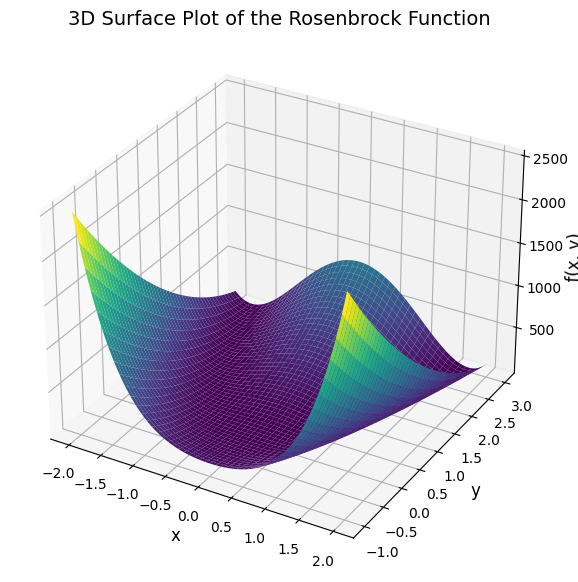

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Rosenbrock function
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Generate a grid of points over the interval (-2, 2) for both x and y
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)

# Compute the corresponding z values (function values)
Z = rosenbrock(X, Y)

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Add labels
ax.set_title("3D Surface Plot of the Rosenbrock Function", fontsize=14)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('f(x, y)', fontsize=12)

# Show the plot
plt.show()
